# Real or Not? NLP with Disaster Tweets
# Predict which Tweets are about real disasters and which ones are not

predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [23]:
import nltk
import string

In [24]:
from nltk.corpus import stopwords 

# Get the Data

In [3]:
real=pd.read_csv("train (1).csv")

In [4]:
real.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
real.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [7]:
real["length"]=real["text"].apply(len)

In [8]:
real.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


# Data Visualization

C:\Users\Acer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


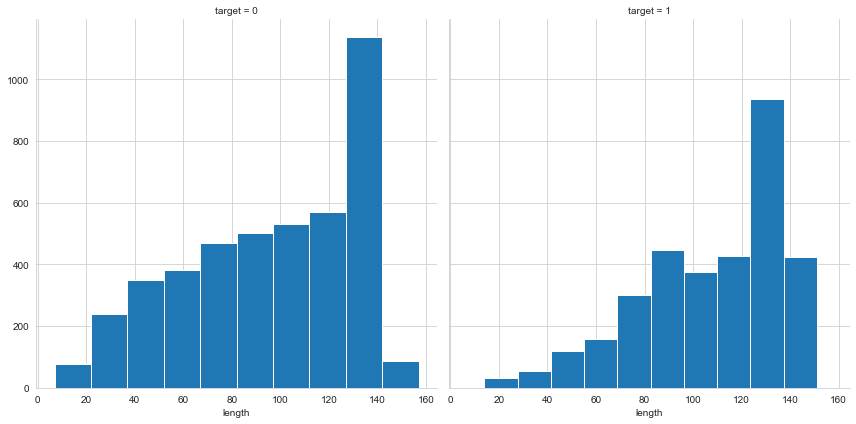

In [9]:
g=sns.FacetGrid(real,col="target",size=6)
g=g.map(plt.hist,"length")

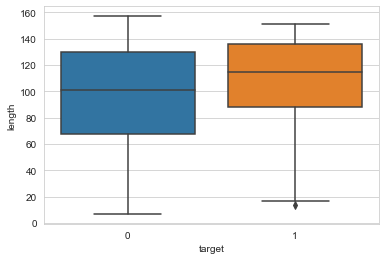

In [10]:
sns.boxplot(x='target',y='length',data=real)

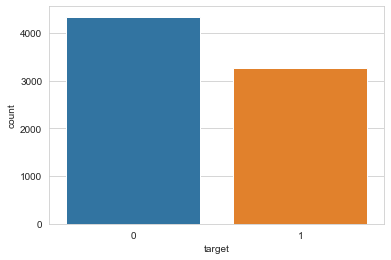

In [11]:
sns.countplot(x="target",data=real)

In [12]:
by=real.groupby("target").mean()
by

,id,length
target,,
0,5276.446338,95.706817
1,5661.608071,108.113421


In [13]:
by.corr()

,id,length
id,1.0,1.0
length,1.0,1.0


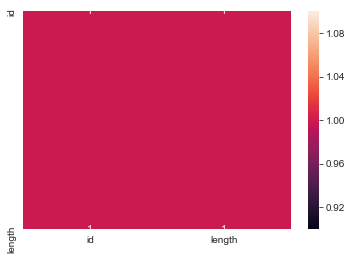

In [14]:
sns.heatmap(by.corr(),annot=True)

In [20]:
X=real["text"]
y=real["target"]

# Text Pre-processing

In [27]:
def text_process(mess):
    nonpunc=[char for char in mess if char not in string.punctuation]
    nonpunc=''.join(nonpunc)
    return([word for word in nonpunc.split() if word not in stopwords.words("english")])

# Vectorization

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer(analyzer=text_process).fit(X)

In [29]:
X=vector.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

# Training a model

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [32]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Model Evaluation¶

In [33]:
predictions = nb.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1111  219]
 [ 284  670]]


              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1330
           1       0.75      0.70      0.73       954

    accuracy                           0.78      2284
   macro avg       0.78      0.77      0.77      2284
weighted avg       0.78      0.78      0.78      2284



# Creating a Data Pipeline¶

In [36]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [39]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [40]:
X = real['text']
y = real['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [41]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000023C1532D288>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [42]:
predictions = pipeline.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1207  123]
 [ 345  609]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1330
           1       0.83      0.64      0.72       954

    accuracy                           0.80      2284
   macro avg       0.80      0.77      0.78      2284
weighted avg       0.80      0.80      0.79      2284



In [44]:
real_test=pd.read_csv("test (1).csv")

In [45]:
real_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [48]:
my_X_test=real_test["text"]

In [49]:
prediction_test=pipeline.predict(my_X_test)

In [50]:
prediction_test.shape

(3263,)

In [51]:
output=pd.DataFrame({"id":real_test["id"],"target":prediction_test})
output["id"]=output["id"].astype(int)
output.to_csv("MY_Real_or_Not",index=False)